### Combine test

In [1]:
from feature_process import *
from data_process import *
from pose_cluster import *

In [23]:
dlc_path = r'..\final_data\mix_landmark7/Cap-C330-basal.csv'
bs_path = r'..\final_data\mix_bsoidfeat/Cap-C330-basal'
vids = ''#r'E:\mice\dataset\video\top_segment\20220428-TV1KO_M\Cap-C330\basal_color.avi'
m1 = miceFeature('basal',dlc_path, bs_path, feat_type='frame')
print(m1.dlc_raw.shape)
print(m1.feature.shape)

(9150, 14)
(9150, 5)


In [9]:
seg = cwt_signal(m1.feature, window=10, step=10, flat=False)
feat = generate_tmpfeat(m1.feature, window=10, step=10)

In [36]:
dist = count_dist(m1.dlc_raw, [[0,3],[3,6],[0,1],[0,2],[3,4],[3,5]])[1:]
ang = count_angle(m1.dlc_raw, [[1,3,2],[0,3,6],[4,3,5]])[1:]
disp = count_disp(m1.dlc_raw, step=1, threshold=None)
# frame feature
feat = dist[:,0:2]
print(feat.shape)
feat = np.hstack([feat, ang[:,0:1]])
print(feat.shape)
feat = np.hstack([feat, disp[:,0:1]])
print(feat.shape)
# segment feature
seg = cwt_signal(feat, window=10, step=10,flat=False)
print(seg.shape)

(9149, 2)
(9149, 3)
(9149, 4)
(913, 10, 24)


In [55]:
x = feat[0:10,0:4]
t = np.arange(len(x))
dt = 1              # sampling frequency
dj = 0.2             # scale distribution parameter
wavelet = wavelets.Morlet()
wa = transform.WaveletTransformTorch(dt, dj, wavelet, cuda=False)

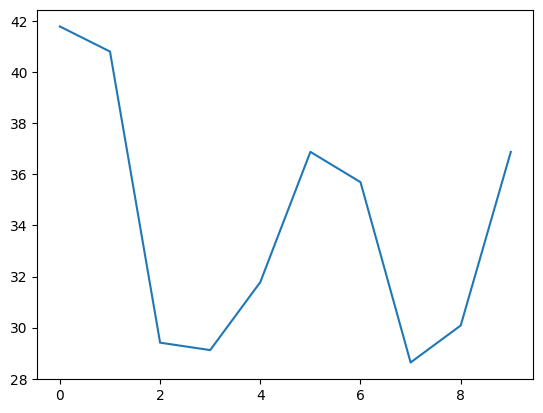

In [60]:
plt.plot(x[:,0])

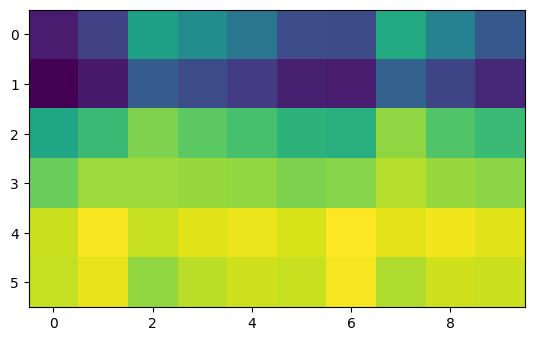

In [59]:
plt.imshow(wa.power(x)[:,:,0].T)

In [57]:
wa.power(x).shape

(10, 6, 4)

In [15]:
np.concatenate([feat, seg], axis=2).shape

(181, 10, 240)

In [3]:
# config
sel_dist=[[0,3],[3,6]]
sel_ang=[[1,3,2]]
sel_coord=[]
normalize_range=(0,1)
include_index = False
seg_window = 10

dist = count_dist(m1.dlc_raw, sel_dist)[1:]
ang = count_angle(m1.dlc_raw, sel_ang)[1:]
disp = count_disp(m1.dlc_raw, step=1, threshold=None)

feat = dist
feat = np.hstack([feat, ang])
feat = np.hstack([feat, disp[:,0:1]])

In [4]:
feat.shape

(9149, 4)

In [8]:
# cwt_signal(feat, window=10, step=5).shape
seg_statistic(feat,'max',window=10,step=5).shape

(1828, 4)

In [3]:
dlc_root = r'..\final_data\mix_landmark7'
dlc7 = DataSet(dlc_root)


basal: 41  ,pain: 15  sng: 14  pH7.4: 12


In [4]:
dlc7.generate_feature()

motions num:  100


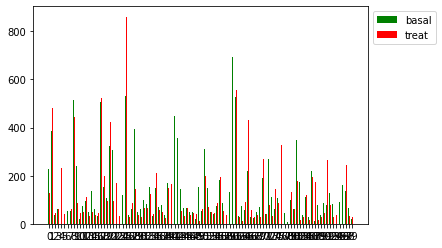

In [5]:
dlc7.pose_cls(sel=['Cap','Capbasal'], sel_num=20, embed=False, k=100, cls_type='km', clf_type='svm')
dlc7.motion_del=True
dlc7.generate_train_test()

In [9]:
np.unique(dlc7.y_test)

array([-1,  0,  1,  2])

### wave test

In [10]:
from scipy import signal
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [11]:
t = np.linspace(-1, 1, 10, endpoint=False)

In [12]:
sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)

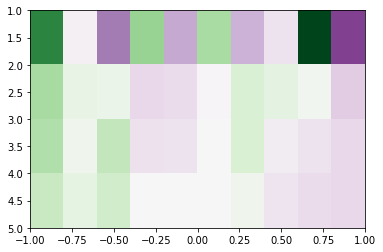

In [70]:
widths = np.arange(1, 5)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 5, 1], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

In [71]:
yf = fft(np.array([sig,sig]))
xf = fftfreq(10, 1)

In [72]:
for x in abs(yf):
    print(x)

[0.02680023 0.03709751 0.21742501 1.1719986  6.06084198 2.55082662
 6.06084198 1.1719986  0.21742501 0.03709751]
[0.02680023 0.03709751 0.21742501 1.1719986  6.06084198 2.55082662
 6.06084198 1.1719986  0.21742501 0.03709751]


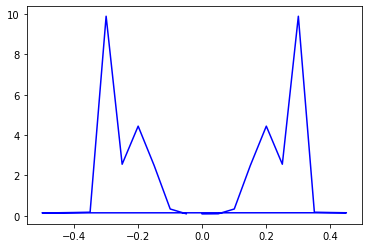

In [43]:
plt.plot(xf, abs(yf), linestyle='-', color='blue')

In [76]:
np.argmax(yf,axis=1)

array([4, 4], dtype=int64)

In [54]:
www.shape

(2, 2)

### analysis

In [24]:
y = np.array([1,2,1,0,2,1,1,-1,-1,0])
pred = np.array([1,2,0,0,2,0,0,-1,2,0])

In [13]:
y[y==1]

array([1, 1, 1, 1])

In [25]:
tp = np.count_nonzero(((y==1) & (pred==1)) | ((y==2) & (pred==2)))
tn = np.count_nonzero(((y==0) & (pred==0)) | ((y==-1) & (pred==-1)))
fp = np.count_nonzero(((y==0) & ((pred==1)|(pred==2))) | ((y==-1) & ((pred==1)|(pred==2))) )
fn = np.count_nonzero(((y==1) & ((pred==0)|(pred==-1))) | ((y==2) & ((pred==0)|(pred==-1))) )


In [9]:
import csv

In [13]:
file = open('./test.csv',mode='a', newline='')
writer = csv.writer(file)
writer.writerow(['abc',1,2,3])
file.close()

In [18]:
save_path = r'C:\Users\x\Desktop\final_data/'
if(save_path[-1]=='/'or save_path[-1]=='\\'):
    save_path = save_path[:-1]
save_path = save_path.split('/')[-1]
save_path = save_path.split('\\')[-1]
print(save_path )

final_data
